$$
\textbf{Corporate Credit Rating Analysis Using Markov Chains}
$$

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as  pltcolors
from IPython.display import display

$$
\begin{aligned}
&\text{The coefficient } P_{ij} \text{ reflects the probability of transitioning} \\
&\text{from the } i\text{-th state to the } j\text{-th state in our list of states.} \\
\end{aligned}
$$

$$
S = \{ \text{AAA}, \text{AA}, \text{A}, \text{BBB}, \text{BB}, \text{B},
\text{CCC}, \text{CC}, \text{C}, \text{D} \}
$$

$$
\begin{aligned}
&\text{Let's define an arbitrary transition matrix }  P
\end{aligned}
$$

In [38]:
states=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
transition_matrix= np.array([
        [0.85, 0.10, 0.04, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],  # AAA -> AAA, AA, A, BBB, BB, B, CCC, CC, C, D
        [0.05, 0.80, 0.10, 0.04, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00],  # AA -> AAA, AA, A, BBB, BB, B, CCC, CC, C, D
        [0.02, 0.08, 0.75, 0.12, 0.03, 0.00, 0.00, 0.00, 0.00, 0.00],  # ...
        [0.01, 0.03, 0.10, 0.75, 0.10, 0.01, 0.00, 0.00, 0.00, 0.00],  
        [0.00, 0.02, 0.05, 0.10, 0.70, 0.10, 0.02, 0.01, 0.00, 0.00],  
        [0.00, 0.00, 0.03, 0.07, 0.12, 0.65, 0.08, 0.03, 0.02, 0.00],  
        [0.00, 0.00, 0.00, 0.04, 0.08, 0.10, 0.65, 0.08, 0.03, 0.02],  
        [0.00, 0.00, 0.00, 0.02, 0.04, 0.06, 0.10, 0.65, 0.10, 0.03],  
        [0.00, 0.00, 0.00, 0.01, 0.02, 0.04, 0.06, 0.10, 0.67, 0.10],  
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00],  # D (absorbing state)
    ])

In [39]:
from IPython.display import display, Markdown
display(Markdown("# I. Simulation"))

# I. Simulation

$$
\begin{aligned}
&\text{We are going to simulate a small example with 200 firms, each one} \\
&\text{being randomly assigned an initial credit rating. This will allow us to see} \\
&\text{how the system behaves under repeated transitions.}
\end{aligned}
$$


In [40]:
"""Simulate a simple dataset: each client has an initial rating and an annual rating."""

def simulate_transition(states, n_clients=200,seed=0):
    
    #the clients' initial rating is initialized
    rng = np.random.default_rng(seed)
    P= transition_matrix
    m = P.shape[0] 
    init = rng.choice(states, size=n_clients, p=np.full(m, 1/m)) #They are selected with uniform probability

    #The client's rating_1 is computed based on the transition matrix we have defined#
    dest_year1 = []
    for s in init:
        i = states.index(s) 
        dest_year1.append(rng.choice(states, p=P[i]))

    #The dataset is defined using the information obtained
    df = pd.DataFrame({'client_id': np.arange(1,n_clients+1), 'rating_0': init, 'rating_1': dest_year1})
    return df

states=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
simulate_transition(states, n_clients=200,seed=0)

,client_id,rating_0,rating_1
0,1,CCC,CCC
1,2,A,A
2,3,AAA,AAA
3,4,AAA,AAA
4,5,C,C
...,...,...,...
195,196,B,BB
196,197,AAA,AAA
197,198,CC,B
198,199,D,D


$$
\begin{aligned}
&\text{Now, we will repeat the same procedure, but using an } n\text{-year transition matrix.} \\
&\text{In our case, since the Markov chain is homogeneous, we can compute } P^{(n)} \\
&\text{directly by raising the one-year transition matrix to the } n\text{-th power.} \\
&\text{A Markov chain is homogeneous if, for any given } t, \\
&\mathbb{P}(X_{t+m} = j \mid X_t = i) 
= \mathbb{P}(X_{m} = j \mid X_0 = i), 
\quad \forall\, m \in \mathbb{N}, \\
&\text{which ensures the property } P^{(n)} = P^n \text{ that we use here.}
\end{aligned}
$$

In [41]:
"""Simulates a simple dataset: each client has an initial rating and a rating at year X."""

def simulate_transitions(states, n_clients=200,seed=0, year=5):

    #The initial states are initialized and the X-year transition matrix is computed based on Markov chain theory
    rng = np.random.default_rng(seed)
    P= transition_matrix
    Power=P
    for k in range (1,year):
        Power=np.dot(Power,P)
    m = P.shape[0] 
    init = rng.choice(states, size=n_clients, p=np.full(m, 1/m)) #They are selected with uniform probability
    
    #The client's rating for year X is computed based on the transition matrix and the corresponding matrix power 
    dest = []
    for s in init:
        i = states.index(s) 
        dest.append(rng.choice(states, p=Power[i])) 

    #The dataset is defined using the information obtained
    df = pd.DataFrame({'client_id': np.arange(1,n_clients+1), 'rating_0': init, f'rating_{year}': dest})
    return df

states=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
simulate_transitions(states, n_clients=200,seed=0,year=5)

,client_id,rating_0,rating_5
0,1,CCC,BB
1,2,A,AA
2,3,AAA,AA
3,4,AAA,AAA
4,5,C,C
...,...,...,...
195,196,B,BBB
196,197,AAA,A
197,198,CC,BBB
198,199,D,D


$$
\begin{aligned}
&\text{Using the same idea, we can simulate the evolution of credit ratings over } N \text{ years.} \\
&\text{Since the chain is homogeneous and satisfies } P^{(n)} = P^n, \text{ we can build the} \\
&\text{multi-year transition matrices iteratively. The one-year matrix is } P, \text{ the} \\
&\text{two-year matrix is obtained by multiplying the previous one by } P, \text{since}\\
&\text{we have that } P^{(2)}=P^2=P·P. \text{ The three-year matrix is } P^{(3)}=P·P^2, \text{ which is} \\
&\text{the matrix we have obtained before and multiplying it by } P. \text{ Thus, each step uses} \\
&\text{the property that repeated application of } P \text{ produces } P^n.
\end{aligned}
$$

In [42]:
"""Simulates a simple dataset: each client has an initial rating and ratings for X consecutive years."""

def simulate_transitions_years(states, n_clients=200,seed=0,years=10): 
    #The initial states are defined and a ratings matrix is initialized, where the obtained ratings will be stored later.
    rng = np.random.default_rng(seed)
    print(rng)
    P= transition_matrix
    m = P.shape[0] 
    ratings = np.empty((n_clients, years + 1), dtype=object) 
    ratings[:, 0] = rng.choice(states, size=n_clients, p=np.full(m, 1/m)) # The initial states are selected with uniform probability

    #The ratings of each client are simulated for X consecutive years and stored in the 'ratings' matrix.
    for year in range (1,years+1):
        for i, s in enumerate(ratings[:, year-1]):  
            idx = states.index(s)
            ratings[i, year] = rng.choice(states, p=P[idx])
    cols = [f"rating_{i}" for i in range(years + 1)]

    #The dataset is defined using the information obtained
    df = pd.DataFrame(ratings, columns=cols)
    df.insert(0, 'client_id', np.arange(1, n_clients + 1))
    return df

df=simulate_transitions_years(states, n_clients=200,seed=0,years=10)
df


Generator(PCG64)


,client_id,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,1,CCC,CCC,B,A,BBB,AA,AA,A,A,AA,BBB
1,2,A,A,BBB,BBB,BBB,BBB,BBB,BBB,BB,BB,A
2,3,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AA
3,4,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA,AAA
4,5,C,C,C,C,C,C,C,D,D,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,B,BB,BB,BB,BB,BB,CC,CC,CCC,BBB,BBB
196,197,AAA,AAA,AAA,AAA,AAA,AA,AA,AA,AA,BBB,BBB
197,198,CC,B,B,B,B,BB,BB,CCC,CCC,CCC,B
198,199,D,D,D,D,D,D,D,D,D,D,D


$$
\begin{aligned}
&\text{Let's  plot the evolution of a specific customer and the first} \\
&\text{five customers in the dataset, so we have a graphical} \\
&\text{visualization and observe how these customers evolve visually.}
\end{aligned}
$$

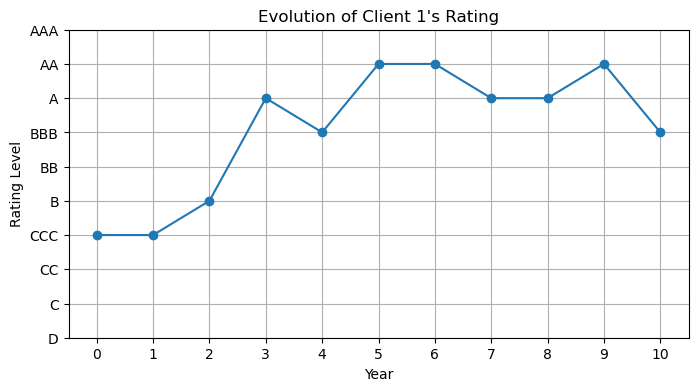

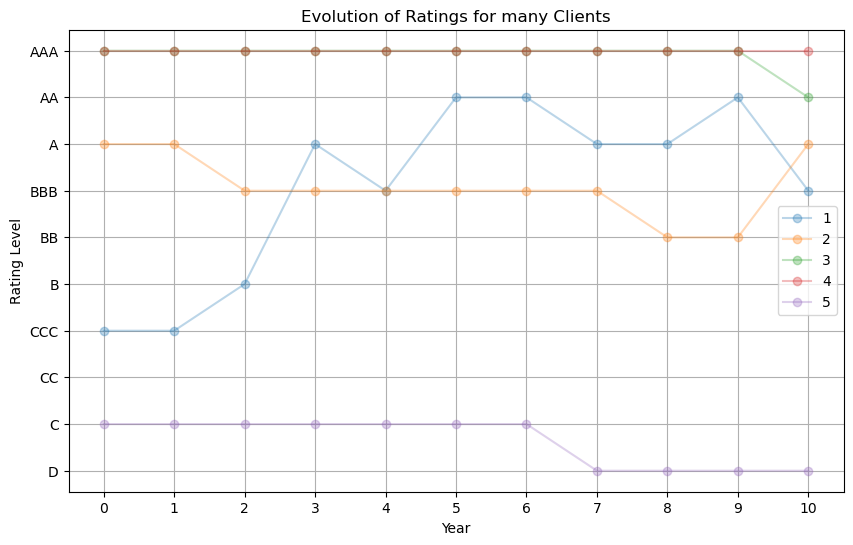

In [43]:
"The evolution of the clients is plotted."

#Numeric values are assigned to the different states that have been defined.
rating_to_num = {"AAA": 9,"AA": 8,"A": 7,"BBB": 6,"BB": 5,"B": 4,"CCC": 3,"CC": 2,"C": 1,"D": 0}

# We are selecting a specific client to track their rating evolution #
for col in [c for c in df.columns if "rating_" in c]:
    df[f"{col}_num"] = df[col].map(rating_to_num)
client_id = 1 # The client is selected 
client = df[df["client_id"] == client_id]
cols_num = [c for c in df.columns if "_num" in c]
ratings_num = client[cols_num].values.flatten()

# The plot for the selected client is created 
plt.figure(figsize=(8, 4))
plt.plot(range(len(cols_num)), ratings_num, marker="o", linestyle="-")
plt.title(f"Evolution of Client {client_id}'s Rating")
plt.xlabel("Year")
plt.xticks([i for i in range(len(cols_num))])
plt.yticks([i for i in range(10)], states[::-1])
plt.ylabel("Rating Level")
plt.grid(True)
plt.show()

"The same procedure is applied to multiple clients"

# The plot for all selected clients is created simultaneously 
df=df.head() # Only the head of the dataset is taken to avoid overcrowding the plot and to make it more readable 
cols_num = [c for c in df.columns if "_num" in c]
x = range(len(cols_num))

#A loop is used to plot each selected client's evolution 
plt.figure(figsize=(10, 6))
for i in range(len(df)):
    plt.plot(x, df.loc[i, cols_num], alpha=0.3,marker="o", linestyle="-")  # alpha=0.3 This prevents the plot from becoming overcrowded.
plt.title("Evolution of Ratings for many Clients")
plt.xticks([i for i in range(len(cols_num))]) # The x-axis (years) is labeled with all years numerically 
plt.yticks([i for i in range(10)], states[::-1]) # The y-axis numbers are replaced with the corresponding states
plt.xlabel("Year")
plt.ylabel("Rating Level")
plt.grid(True)
plt.legend(f'12345')  
plt.show()



$$
\begin{aligned}
&\text{Now, we will create a function that provides a good approximation of the transition matrix} \\
&\text{from a dataset with an initial rating and a one-year rating.} \\
&\text{By applying uniform probability, we will calculate the approximate coefficients of our transition matrix.} \\
&\text{We are not using any dataset from a real company, so we will use our simulations} \\
&\text{with our initial transition matrix to create this approximation.} \\
&\text{We will see that the margin of error between the coefficients of the real and approximate matrices} \\
&\text{will be on the order of $10^{-3}$, which is practically insignificant.}
\end{aligned}
$$

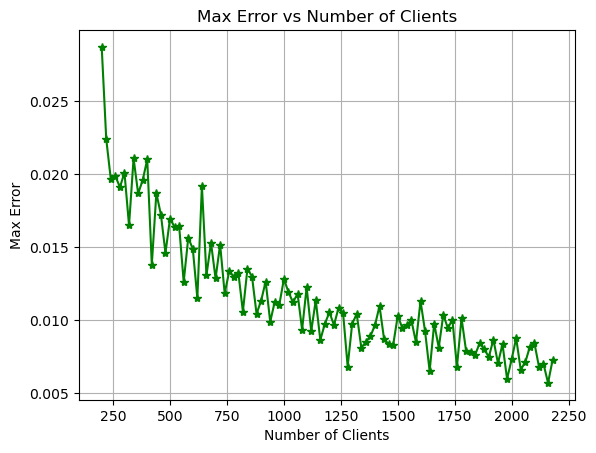

In [45]:
"The transition matrix is created from a dataset containing the initial rating and the following year's rating"

# The dataset must contain at least one client in each initial state to avoid division by zero issues.
# With large datasets, this problem is unlikely to occur.

def Matrix_transition(data):
    P=np.zeros((10,10))
    for i in range (10):
        # Clients with rating_0 == states[i] are filtered, and a new dataset is created containing only these clients 
        initial=data[data['rating_0']==states[i]] 
        # Count how many clients moved to each rating in rating_1
        transition_counts = initial['rating_1'].value_counts()
        # Reindex to include all possible states, filling missing states with 0
        transition_counts = transition_counts.reindex(states, fill_value=0)
        transition_list = transition_counts.tolist()
        # Compute the total number of clients in the initial state
        total=sum(transition_list)
        # Fill row i of the transition matrix with probabilities for moving to each state
        for j in range (10):
            P[i][j]=transition_list[j]/total
    return P

df=simulate_transitions(states, n_clients=100000,seed=0, year=1)
P_aprox=Matrix_transition(df)
P=transition_matrix #defined at the beginning of the project

def Error_Matrix(P_original,P_aprox):

    # The error matrix is defined 
    Error_matrix=P_aprox-P_original
    Error_total=0

    # The absolute errors of each coefficient in the error matrix are summed 
    for i in range(len(P[1])):
        for j in range(len(P[1])):
            Error_total+=np.abs(Error_matrix[i][j])
    # The mean of the errors is calculated 
    Error_mean=(Error_total)/((len(P_original))**2)
    # The maximum error among the coefficients is selected 
    Error_max=np.max(np.abs(Error_matrix))
    return Error_total,Error_mean,Error_max


P_original=transition_matrix #defined at the beginning of the project

n_clients=[20*i for i in range(10,110)]
list_df=[simulate_transitions(states,n_clients[i],seed=i,year=1) for i in range (100)] # The seed is varied to run different simulations #
list_error_total=[Error_Matrix(P_original,Matrix_transition(list_df[i]))[0] for i in range (100)]
list_error_mean=[Error_Matrix(P_original,Matrix_transition(list_df[i]))[1] for i in range (100)]
list_error_max=[Error_Matrix(P_original,Matrix_transition(list_df[i]))[2] for i in range (100)]

# Graph: Max Error
plt.figure()
plt.plot(n_clients, list_error_mean, color='green', marker='*')
plt.title("Max Error vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Max Error")
plt.grid(True)
plt.show()


$$
\begin{aligned}
&\text{The plot shows a clear decreasing trend in the maximum error as the number of clients increases,} \\
&\text{indicating convergence of the estimator. Although the curve exhibits some fluctuations due to} \\
&\text{simulation variability, the error generally stabilizes around a small positive value at higher sample sizes.} \\
&\text{This suggests that beyond a certain sample size (around 1500--2000 clients), additional data yields} \\
&\text{diminishing returns in error reduction. Overall, the plot confirms the expected convergence behavior} \\
&\text{of the simulation-based estimation.}
\end{aligned}
$$

$$
\begin{aligned}
&\text{Once we have a real company dataset with the initial rating and the following year's rating,} \\
&\text{we will be able to create an approximation of the transition matrix using the function defined previously,} \\
&\text{and we will be able to apply all the previous simulation programs with this new matrix.}
\end{aligned}
$$

In [46]:
display(Markdown("# II. Default Probabilities and Expected Gain"))

# II. Default Probabilities and Expected Gain

$$
\begin{aligned}
&\text{Consider now a loan of size } S_0 \text{ granted at interest rate } r \text{ for } X \text{ years. Two outcomes exist:} \\
&\text{Payoff } = 
\begin{cases} 
0, & \text{if default occurs}, \\
S_0 (1+r)^X, & \text{if the firm survives}.
\end{cases} \\
&\text{Let } q_X(i) = \text{PD}_X(i). \text{ The expected payoff is:} \\
&\text{EG}_X(i) = S_0 (1 - q_X(i)) (1+r)^X. \\
&\text{The expected net gain, subtracting the initial outlay, is:} \\
&\text{ENG}_X(i) = S_0 \Big[ (1 - q_X(i)) (1+r)^X - 1 \Big]. \\
&\text{These formulas connect default risk with expected credit returns under the Markov framework.}
\end{aligned}
$$

In [47]:
def credit_risk_metrics(P, states, initial_rating, r, S0, N):
    """
    P: transition matrix (numpy array) of size k x k
    rating_list: list of states in order (e.g., ["AAA","AA","A","BBB","BB","B","CCC","CC","C","D"])
    initial_rating: initial rating (e.g., "BBB")
    r: annual interest rate
    S0: initial loan amount
    N: number of years
    """
   
    i0 = states.index(initial_rating)  #The index of the client's state in the list of states is selected 
    P_N = np.linalg.matrix_power(P, N) # The required matrix power is computed according to the number of years 
    idx_default = states.index("D") # The index of the default state is stored 
    
    #Probability of default in N years
    qN = P_N[i0, idx_default]
    #Expected gain
    EG = S0 * (1 - qN) * (1 + r)**N
    #Expected net gain)
    ENG = EG - S0

    return qN, EG, ENG



credit_risk_metrics(Matrix_transition(df), states, initial_rating='A', r=0.05, S0=10000, N=5)


(0.0002638268110083042, 12759.448452054172, 2759.448452054172)

$$
\begin{aligned}
&\text{Next, we will visualise how the cumulative probability of default evolves} \\
&\text{across different initial ratings and time horizons. This will be displayed} \\
&\text{through a heatmap, which highlights how default risk increases as the} \\
&\text{number of years grows and as the initial credit quality deteriorates.}
\end{aligned}
$$

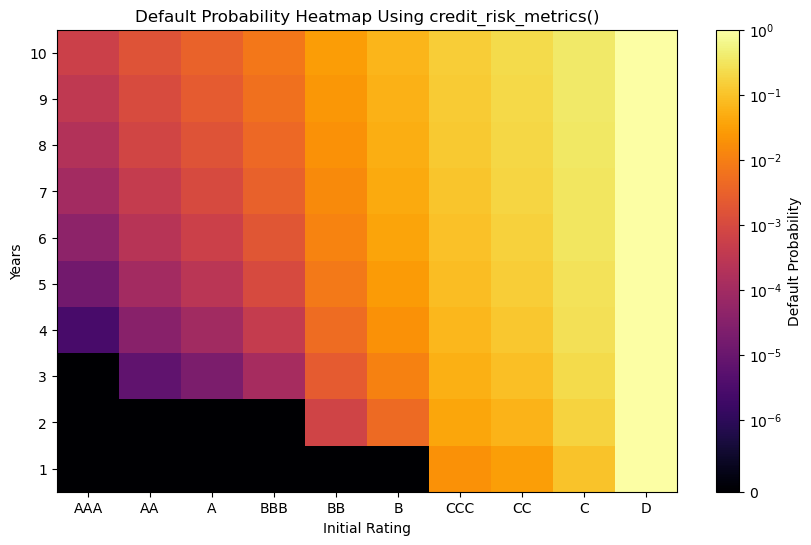

In [48]:
def build_heatmap(P, states, r, S0, max_years):
    heat = np.zeros((max_years, len(states)))

    for i_state, state in enumerate(states):
        for N in range(1, max_years + 1):
            qN= credit_risk_metrics(P, states, state, r, S0, N)[0]
            heat[N-1, i_state] = qN

    return heat

max_years = 10
heat = build_heatmap(P, states, r=0.05, S0=10000, max_years=max_years)

plt.figure(figsize=(10, 6))

plt.imshow(
    heat,
    cmap="inferno",  # high contrast colormap
    norm=pltcolors.SymLogNorm(linthresh=1e-6),# enhances differences for small values
    aspect="auto",
    origin="lower"   
)

plt.colorbar(label="Default Probability")
plt.xticks(np.arange(len(states)), states, )
plt.yticks(np.arange(max_years), np.arange(1, max_years + 1))

plt.xlabel("Initial Rating")
plt.ylabel("Years")
plt.title("Default Probability Heatmap Using credit_risk_metrics()")


plt.show()

$$
\begin{aligned}
&\text{We observe that the diagonals running from the upper-left to the lower-right of the heatmap} \\
&\text{display similar color intensities. This indicates an approximate equivalence between the default} \\
&\text{probability of rating state } i \text{ at year } j \text{ and that of rating state } i-1 \text{ at year } j+1. \\
&\text{This near-diagonal relationship is particularly evident for the highest credit-quality ratings} \\
&\text{(AAA, AA, A, BBB), where credit deterioration tends to occur gradually rather than abruptly.}
\end{aligned}
$$

$$
\begin{aligned}
&\text{In the following plot, we analyse how the expected net gain evolves as a function} \\
&\text{of the initial credit rating and the investment horizon. For several values of } N, \\
&\text{we compute the ENG for an initial capital under the chosen } S_0 \\
&\text{transition matrix and discount rate. Each curve corresponds to a} \\
&\text{different investment horizon, allowing us to compare how} \\
&\text{profitability changes across both time and rating quality.}
\end{aligned}
$$

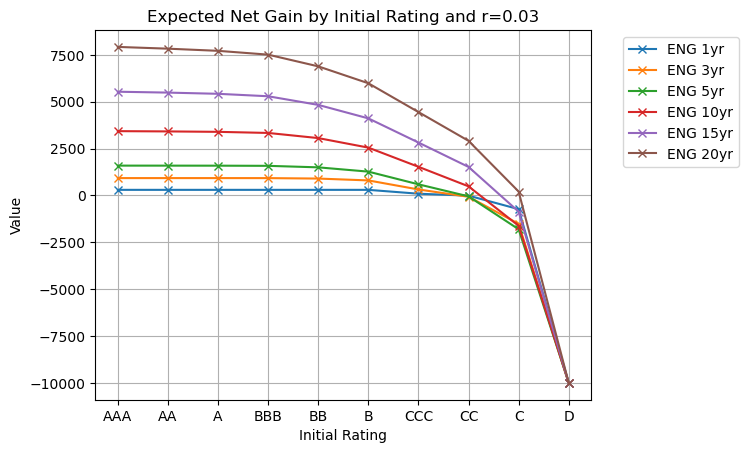

In [49]:
years = [1, 3, 5, 10, 15, 20]
for N in years:
    EG_list = []
    ENG_list = []
    for state in states:
        ENG = credit_risk_metrics(P, states, state, r=0.03, S0=10000, N=N)[2]
        ENG_list.append(ENG)
    
    plt.plot(states, ENG_list, marker='x', label=f'ENG {N}yr')
 
plt.xlabel("Initial Rating")
plt.ylabel("Value")
plt.title("Expected Net Gain by Initial Rating and r=0.03")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

$$
\begin{aligned}
&\text{As expected, the plot shows that higher-rated firms yield larger expected net gains} \\
&\text{across all horizons, reflecting their lower default risk. Lower-rated firms become} \\
&\text{profitable only for short horizons, as long-term default probabilities dominate.} \\
&\text{It is also interesting to experiment with different return values } r \text{ to see} \\
&\text{under which conditions low-rated firms may become attractive investments.}
\end{aligned}
$$

$$
\begin{aligned}
&\text{In the following analysis, we compare rating groups by aggregating them into three} \\
&\text{categories: High (AAA, AA, A), Medium (BBB, BB, B), and Low (CCC, CC, C). For each} \\
&\text{group, we compute both the average expected net gain and the average probability of} \\
&\text{default over a } 10\text{-year horizon. This allows us to visualise how profitability and} \\
&\text{credit risk behave at a broader, group-based level rather than state by state.}
\end{aligned}
$$

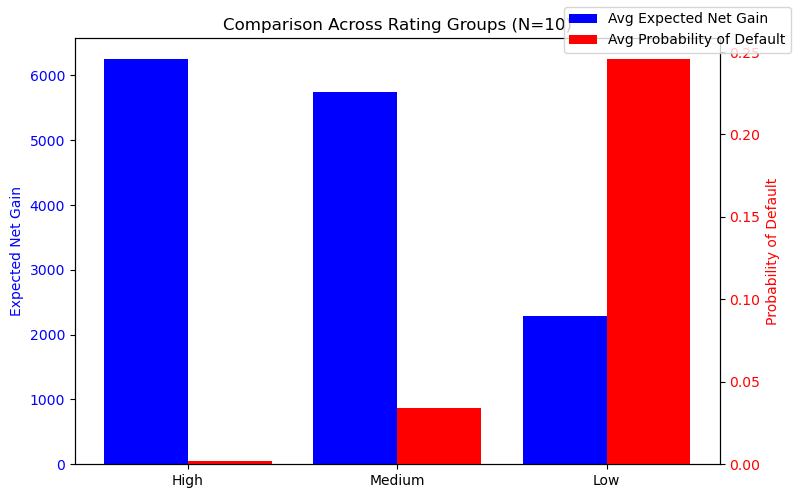

In [50]:
# Define rating groups
groups = {"High": ["AAA", "AA", "A"],"Medium": ["BBB","BB", "B"],"Low": ["CCC", "CC", "C"]}

# The values are set #
S0 = 10000
N = 10
r = 0.05

avg_PD = []
avg_ENG = []

for group_name, group_ratings in groups.items():
    PD_group = []
    ENG_group = []
    for rating in group_ratings:
        qN, _, ENG = credit_risk_metrics(P, states, rating, r, S0, N)
        PD_group.append(qN)
        ENG_group.append(ENG)
    avg_PD.append(np.mean(PD_group))
    avg_ENG.append(np.mean(ENG_group))

x = np.arange(len(groups))

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar for Expected Net Gain
ax1.bar(x - 0.2, avg_ENG, width=0.4, color='blue', label='Avg Expected Net Gain')
ax1.set_ylabel("Expected Net Gain", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for Probability of Default
ax2 = ax1.twinx()
ax2.bar(x + 0.2, avg_PD, width=0.4, color='red', label='Avg Probability of Default')
ax2.set_ylabel("Probability of Default", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(x, groups.keys())
plt.title(f"Comparison Across Rating Groups (N={N})")
fig.tight_layout()
fig.legend(loc="upper right")
plt.show()

$$
\begin{aligned}
&\text{As expected, the Low group displays both substantially lower expected gains and a far higher} \\
&\text{default risk, making it the least favourable category overall. However, it is interesting} \\
&\text{to see results how the High and Medium groups exhibit very similar expected net gains,} \\
&\text{despite their differing credit qualities. It is true that the Medium group carries a higher} \\
&\text{probability of default which reduces its attractiveness, but it is interesting nevertheless.} \\
\end{aligned}
$$